# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [45]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [46]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [47]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [48]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [49]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-04T13:01:29+0300',
 'created_at': '2023-03-04T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [50]:
data['found']

256

Количество страниц в результатах поиска

In [51]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [52]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-04T13:01:29+0300,2023-03-04T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,None,None,2023-03-03T16:06:49+0300,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [53]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [54]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [55]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "\"Data Scientist\" OR \"аналитик данных\" OR \"Big Data\" OR \"ML-инженер\"",
    'area': 1,
    'page': 0,
    'per_page': 100
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

num_pages = data['pages']
df = pd.json_normalize(data['items'])

for i in range(num_pages):
    params['page'] += 1

    sleep(0.1)

    req = requests.get(URL, params)
    data = json.loads(req.content.decode())

    df_new = pd.json_normalize(data['items'])
    df = pd.concat([df, df_new])

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [56]:
df.drop_duplicates(subset="id")

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,department.name,employer.logo_urls,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,insider_interview.id,insider_interview.url
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-04T13:01:29+0300,2023-03-04T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76536709,False,Data Scientist (LTV),NaN,False,False,None,None,2023-03-04T11:32:26+0300,2023-03-04T11:32:26+0300,...,"билайн: ИТ, Data, Digital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-03-04T12:06:39+0300,2023-03-04T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77436241,False,Аналитик данных (SQL),NaN,False,False,None,None,2023-03-04T12:00:40+0300,2023-03-04T12:00:40+0300,...,NaN,NaN,Парк культуры,Сокольническая,1.103,1,55.736163,37.595027,NaN,NaN
4,77656659,False,Data Scientist,NaN,False,False,None,None,2023-03-03T16:15:22+0300,2023-03-03T16:15:22+0300,...,NaN,NaN,Бульвар Дмитрия Донского,Серпуховско-Тимирязевская,9.170,9,55.568201,37.576856,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,74943842,False,Веб-аналитик,NaN,True,False,None,None,2023-02-03T12:33:58+0300,2023-02-03T12:33:58+0300,...,NaN,NaN,Охотный ряд,Сокольническая,1.98,1,55.757228,37.615078,NaN,NaN
27,74092302,False,Системный аналитик,NaN,False,False,None,None,2023-02-06T13:04:05+0300,2023-02-06T13:04:05+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,76731456,False,DevSecOps engineer,NaN,False,False,None,None,2023-02-07T16:55:24+0300,2023-02-07T16:55:24+0300,...,Schlumberger. АО ИКФ-Сервис,NaN,Войковская,Замоскворецкая,2.30,2,55.818923,37.497791,NaN,NaN
29,76568566,False,Project Manager/Продюсер реальных кейсов,NaN,False,False,None,None,2023-02-02T20:04:03+0300,2023-02-02T20:04:03+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [57]:
detailed_description = pd.DataFrame()

num_vacancies = df['id'].size

for i in range(num_vacancies):
    vacancy = df['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

    sleep(0.1)

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())

    df_vacancy = pd.json_normalize(vacancy_info)
    detailed_description = pd.concat([detailed_description, df_vacancy])

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [58]:
detailed_description[['name', 'key_skills', 'salary', 'salary.to', 'salary.from', 'salary.currency', 'salary.gross']].to_excel('data_scientists.xlsx')

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [59]:
detailed_description['id'].size

1331

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Посчитаем сколько раз встречался каждый навык в 'key_skills' и составим таблицу из этих данных.

In [60]:
num_skills = {}

for index, row in detailed_description.iterrows():
    for skills in row['key_skills']:
        for key, value in skills.items():
            num_skills[value] = num_skills.get(value, 0) + 1

df_skills = pd.DataFrame(num_skills.items(), columns=['skill', 'vacancies number'])
df_skills

,skill,vacancies number
0,Python,411
1,PyTorch,28
2,Machine Learning,55
3,Spark,96
4,SQL,467
...,...,...
1409,Широкий кругозор,1
1410,Data Studio,2
1411,Secuity Software,1
1412,Azure,1


Отсортируем навыки по частоте востребованности в порядке убывания. Рассмотрим топ-15 навыков.

In [61]:
df_skills = df_skills.sort_values(['vacancies number'], ascending=False)
df_skills.head(15)

,skill,vacancies number
4,SQL,467
0,Python,411
14,Big Data,175
11,Анализ данных,160
26,Аналитическое мышление,125
7,Hadoop,115
3,Spark,96
60,PostgreSQL,89
21,MS SQL,81
8,Git,71


Text(0.5, 1.0, 'Skills required in data science')

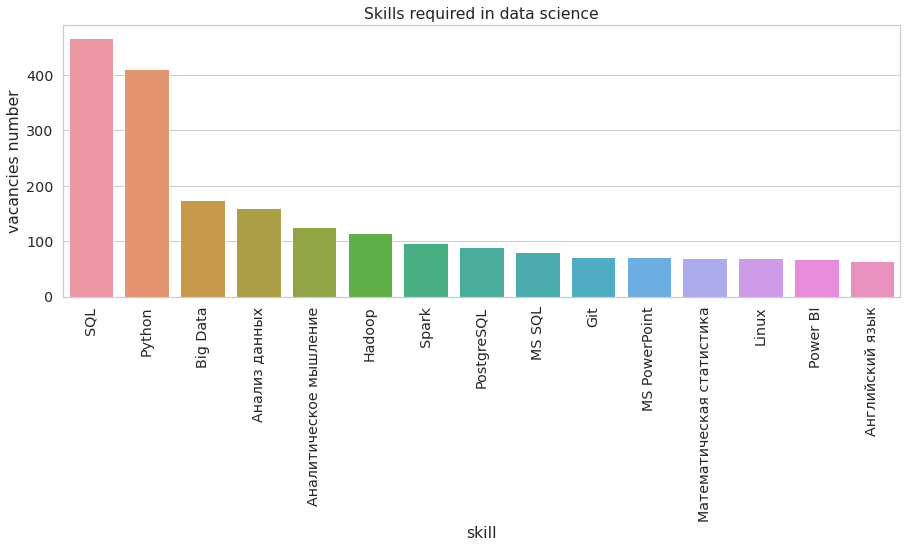

In [62]:
plt.figure(figsize=(15, 5))

barplot = sns.barplot(df_skills.head(15), x='skill', y='vacancies number')

plt.xticks(rotation=90)
plt.title('Skills required in data science')

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Заведем копию таблицы. Домножим salary.from и salary.to на 0.87 (коэффицент нужен для того, чтобы получить зарплату после вычета налогов).

In [63]:
salary_info = detailed_description[['name', 'salary', 'salary.to', 'salary.from', 'salary.currency', 'salary.gross']].copy(deep=True)

salary_info['salary.from'] = np.where(salary_info['salary.gross'], salary_info['salary.from'] * 0.87, salary_info['salary.from'])
salary_info['salary.to'] = np.where(salary_info['salary.gross'], salary_info['salary.to'] * 0.87, salary_info['salary.to'])

salary_info

,name,salary,salary.to,salary.from,salary.currency,salary.gross
0,Data scientist,NaN,240000.0,200000.0,RUR,False
0,Data Scientist (LTV),NaN,NaN,NaN,NaN,NaN
0,Data Scientist middle+/Senior,NaN,350000.0,250000.0,RUR,False
0,Аналитик данных (SQL),NaN,NaN,NaN,NaN,NaN
0,Data Scientist,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
0,Веб-аналитик,NaN,NaN,NaN,NaN,NaN
0,Системный аналитик,NaN,NaN,NaN,NaN,NaN
0,DevSecOps engineer,NaN,NaN,NaN,NaN,NaN
0,Project Manager/Продюсер реальных кейсов,NaN,NaN,NaN,NaN,NaN


Удалим выбросы, чтобы посчитать среднее значение зарплаты ( (from + to) / 2 )

In [64]:
salary_info = salary_info.dropna(subset='salary.from')
salary_info = salary_info.dropna(subset='salary.to')

salary_info

,name,salary,salary.to,salary.from,salary.currency,salary.gross
0,Data scientist,NaN,240000.0,200000.0,RUR,False
0,Data Scientist middle+/Senior,NaN,350000.0,250000.0,RUR,False
0,Data Scientist,NaN,200000.0,160000.0,RUR,False
0,Аналитик данных в LovePlanet,NaN,45600.0,45600.0,RUR,False
0,Data Scientist Intern,NaN,43500.0,34800.0,RUR,True
...,...,...,...,...,...,...
0,Менеджер Яндекс.Маркета (удаленно),NaN,98900.0,47300.0,RUR,False
0,DevOps Инженер программных решений,NaN,120000.0,100000.0,RUR,False
0,B2B sales-менеджер,NaN,165300.0,60900.0,RUR,True
0,Продакт-менеджер,NaN,150000.0,60000.0,RUR,False


In [65]:
def count_avg(df):
    return (df['salary.from'] + df['salary.to']) / 2

salary_info['avg_salary'] = salary_info.apply(count_avg, axis='columns')

salary_info

,name,salary,salary.to,salary.from,salary.currency,salary.gross,avg_salary
0,Data scientist,NaN,240000.0,200000.0,RUR,False,220000.0
0,Data Scientist middle+/Senior,NaN,350000.0,250000.0,RUR,False,300000.0
0,Data Scientist,NaN,200000.0,160000.0,RUR,False,180000.0
0,Аналитик данных в LovePlanet,NaN,45600.0,45600.0,RUR,False,45600.0
0,Data Scientist Intern,NaN,43500.0,34800.0,RUR,True,39150.0
...,...,...,...,...,...,...,...
0,Менеджер Яндекс.Маркета (удаленно),NaN,98900.0,47300.0,RUR,False,73100.0
0,DevOps Инженер программных решений,NaN,120000.0,100000.0,RUR,False,110000.0
0,B2B sales-менеджер,NaN,165300.0,60900.0,RUR,True,113100.0
0,Продакт-менеджер,NaN,150000.0,60000.0,RUR,False,105000.0


Осталось перевести все зарплаты в рубли. Курс доллара к рублю будем считать 75.40, курс евро к рублю 80.30.

In [68]:
def to_rubles(df):
    if df['salary.currency'] == 'RUR':
        return df['avg_salary']

    if df['salary.currency'] == 'NAN':
        return df['avg_salary']

    if df['salary.currency'] == 'EUR':
        return df['avg_salary'] * 80.30

    return df['avg_salary'] * 75.40

salary_info['avg_salary'] = salary_info.apply(to_rubles, axis='columns')
salary_info


,name,salary,salary.to,salary.from,salary.currency,salary.gross,avg_salary
0,Data scientist,NaN,240000.0,200000.0,RUR,False,220000.0
0,Data Scientist middle+/Senior,NaN,350000.0,250000.0,RUR,False,300000.0
0,Data Scientist,NaN,200000.0,160000.0,RUR,False,180000.0
0,Аналитик данных в LovePlanet,NaN,45600.0,45600.0,RUR,False,45600.0
0,Data Scientist Intern,NaN,43500.0,34800.0,RUR,True,39150.0
...,...,...,...,...,...,...,...
0,Менеджер Яндекс.Маркета (удаленно),NaN,98900.0,47300.0,RUR,False,73100.0
0,DevOps Инженер программных решений,NaN,120000.0,100000.0,RUR,False,110000.0
0,B2B sales-менеджер,NaN,165300.0,60900.0,RUR,True,113100.0
0,Продакт-менеджер,NaN,150000.0,60000.0,RUR,False,105000.0


Теперь построим гистограмму.

Text(0, 0.5, 'vacancies number')

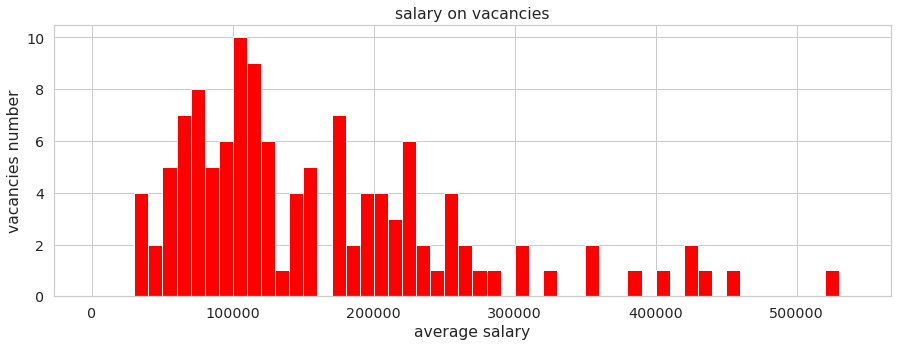

In [76]:
plt.figure(figsize=(15, 5))

plt.hist(salary_info['avg_salary'], bins=np.arange(0, 550000, 10000), color='red')

plt.title('salary on vacancies')
plt.xlabel('average salary')
plt.ylabel('vacancies number')

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Не забывайте про выводы.

1) Для аналитиков данных, в первую очередь, важны знания SQL и Python. Это одни из основных их инструментов.

2) Нередко от data scientist'ов требуют умения пользоваться MS Powerpoint, а также знания английского языка. Вероятно, это требуется для предоставления отчетности заказчику/поддержания контакта с заказчиком.

3) Очевидно, что от аналитиков данных требуют навыков анализа данных, умения работы с Big Data и т.д.

4) Средняя зарплата аналитиков варьируется от 50000 до 550000 рублей. Чаще всего средняя зарплата составляет ~70-250 тыс. рублей.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [67]:
...

Ellipsis

Какие выводы можно сделать из построенных графиков?

<...>